In [10]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [11]:
import pathlib
data_dir = pathlib.Path('data/Shoe vs Sandal vs Boot Dataset')
data_dir

PosixPath('data/Shoe vs Sandal vs Boot Dataset')

In [12]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

15000


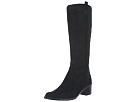

In [13]:
#show a single image
shoe_sandal_boot = list(data_dir.glob('Boot/*'))
PIL.Image.open(str(shoe_sandal_boot[0]))

In [14]:
batch_size = 32
img_height = 180
img_width = 180

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15000 files belonging to 3 classes.
Using 12000 files for training.


In [17]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 15000 files belonging to 3 classes.
Using 3000 files for validation.


In [18]:
#class names
class_names=val_ds.class_names
class_names

['Boot', 'Sandal', 'Shoe']

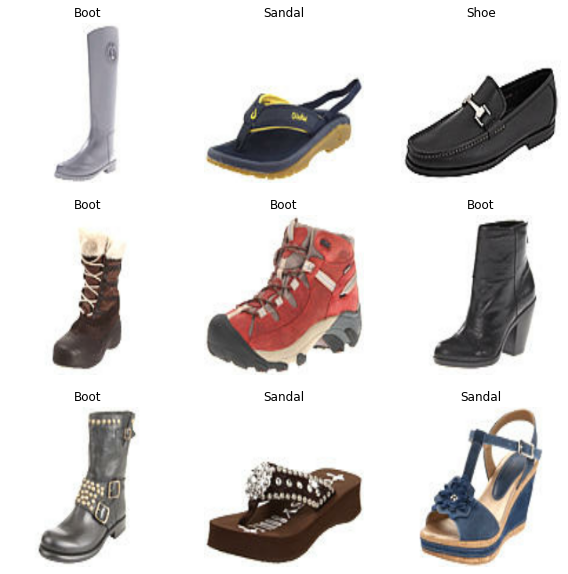

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [21]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [22]:
normalization_layer = layers.Rescaling(1./255)

In [23]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [26]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
375/375 [==============================] - 27s 28ms/step - loss: 0.3089 - accuracy: 0.8823 - val_loss: 0.2159 - val_accuracy: 0.9260
Epoch 2/10
375/375 [==============================] - 9s 24ms/step - loss: 0.1302 - accuracy: 0.9553 - val_loss: 0.1120 - val_accuracy: 0.9653
Epoch 3/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0755 - accuracy: 0.9746 - val_loss: 0.1169 - val_accuracy: 0.9617
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0524 - accuracy: 0.9822 - val_loss: 0.1051 - val_accuracy: 0.9697
Epoch 5/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0285 - accuracy: 0.9894 - val_loss: 0.1163 - val_accuracy: 0.9677
Epoch 6/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0195 - accuracy: 0.9931 - val_loss: 0.1328 - val_accuracy: 0.9710
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0168 - accuracy: 0.9937 - val_loss: 0.1730 - val_accuracy: 0.965

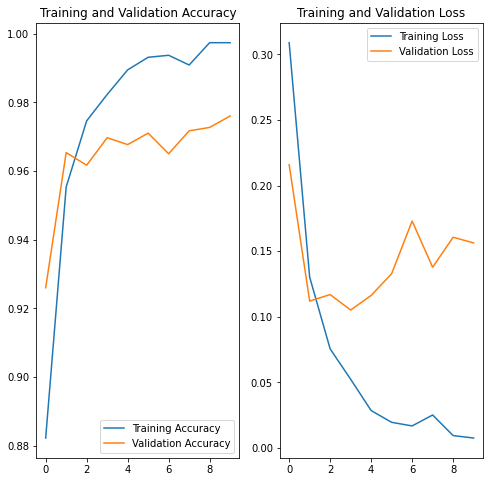

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

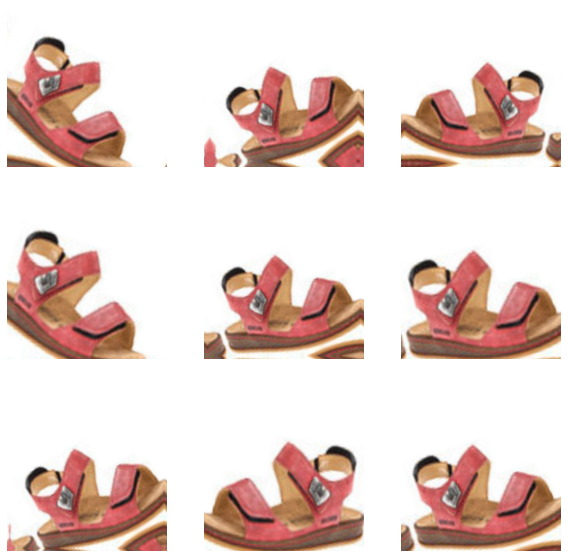

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [30]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                  

In [33]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
375/375 [==============================] - 16s 40ms/step - loss: 0.6511 - accuracy: 0.7312 - val_loss: 0.3455 - val_accuracy: 0.8693
Epoch 2/15
375/375 [==============================] - 16s 42ms/step - loss: 0.3859 - accuracy: 0.8494 - val_loss: 0.2598 - val_accuracy: 0.9053
Epoch 3/15
375/375 [==============================] - 15s 40ms/step - loss: 0.3017 - accuracy: 0.8870 - val_loss: 0.2547 - val_accuracy: 0.9010
Epoch 4/15
375/375 [==============================] - 16s 41ms/step - loss: 0.2473 - accuracy: 0.9092 - val_loss: 0.1673 - val_accuracy: 0.9407
Epoch 5/15
375/375 [==============================] - 15s 40ms/step - loss: 0.2141 - accuracy: 0.9179 - val_loss: 0.1529 - val_accuracy: 0.9483
Epoch 6/15
375/375 [==============================] - 15s 40ms/step - loss: 0.1840 - accuracy: 0.9341 - val_loss: 0.1461 - val_accuracy: 0.9467
Epoch 7/15
375/375 [==============================] - 15s 40ms/step - loss: 0.1677 - accuracy: 0.9378 - val_loss: 0.1244 - val_accuracy:

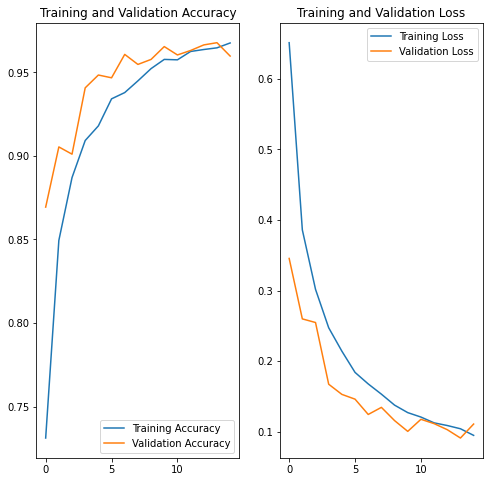

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [46]:
shoe_url = "https://image.shutterstock.com/image-vector/boot-icon-hiking-boots-vector-260nw-1897605388.jpg"
shoe_path = tf.keras.utils.get_file('imag_leg', origin=shoe_url)

img_shoes = tf.keras.utils.load_img(
    shoe_path, target_size=(img_height, img_width)
)
img_shoe_array = tf.keras.utils.img_to_array(img_shoes)
img_shoe_array = tf.expand_dims(img_shoe_array, 0) # Create a batch

predictions = model.predict(img_shoe_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 17ms/step
This image most likely belongs to Shoe with a 72.96 percent confidence.


In [39]:
#save the model

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [52]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [53]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['sequential_1_input'], 'outputs': ['outputs']}}

In [54]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [55]:
test_url = "https://image.shutterstock.com/image-vector/boot-icon-hiking-boots-vector-260nw-1897605388.jpg"
test_path = tf.keras.utils.get_file('sandal', origin=test_url)

test_img = tf.keras.utils.load_img(
    test_path, target_size=(img_height, img_width)
)
test_img_array = tf.keras.utils.img_to_array(test_img)
test_img_array = tf.expand_dims(test_img_array, 0) 

predictions_lite = classify_lite(sequential_1_input=test_img_array)['outputs']
score_lite = tf.nn.softmax(predictions_lite)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score_lite)], 100 * np.max(score_lite))
)

This image most likely belongs to Sandal with a 95.86 percent confidence.
